# Lecture 1 Statistical Distributions
## Part 7: multi-variate normal distribution

reference: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

### 1 Multivariate Normal Distribution

#### Visualization

To demonstrate the properties of a multivariate normal distribution, we can use Python with libraries such as NumPy, SciPy, and Matplotlib. Here's a basic example that covers the following properties:
- Mean and Covariance: Show how the mean and covariance matrix define the distribution.
- Marginal Distributions: Demonstrate that the marginal distributions of a multivariate normal distribution are also normal.
- Conditional Distributions: Show how the conditional distribution is normal.
- Visualization: Plot the multivariate normal distribution to visualize the shape and covariance.

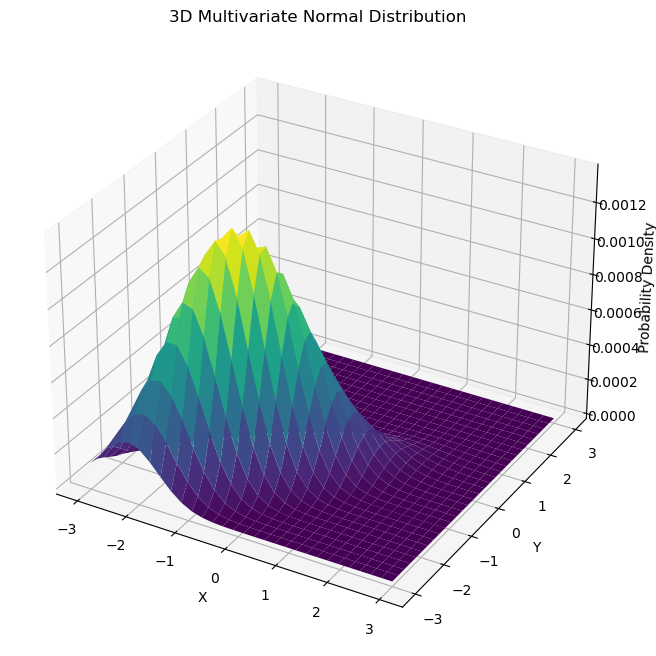

Marginal Distributions:
Variable 1: Mean = 0, Variance = 1
Variable 2: Mean = 0, Variance = 1
Variable 3: Mean = 0, Variance = 1

Conditional Distribution information is not computed in this example.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Parameters for the multivariate normal distribution
mean = [0, 0, 0]  # Mean vector for 3D
cov = [[1, 0.8, 0.3], [0.8, 1, 0.5], [0.3, 0.5, 1]]  # Covariance matrix for 3D

# Create a grid of points
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
z = np.linspace(-3, 3, 30)
X, Y, Z = np.meshgrid(x, y, z)

# Flatten the grid to evaluate the PDF
pos = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

# Define the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Compute the probability density function
pdf = rv.pdf(pos)
pdf = pdf.reshape(X.shape)

# Plot the multivariate normal distribution in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X[:, :, 0], Y[:, :, 0], pdf[:, :, 0], cmap='viridis', edgecolor='none')

# Labels and title
ax.set_title('3D Multivariate Normal Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')

# Show the plot
plt.show()

# Marginal Distributions
print("Marginal Distributions:")
for i in range(len(mean)):
    marginal_mean = mean[i]
    marginal_var = cov[i][i]
    print(f"Variable {i+1}: Mean = {marginal_mean}, Variance = {marginal_var}")

# Conditional Distribution (for a 3D case, it's more complex)
print("\nConditional Distribution information is not computed in this example.")

**Explanation:**
- Mean and Covariance: The mean vector and cov matrix are set to be 3 dimensions.
- Grid Creation: We create 3D grids for x, y, and z. np.meshgrid generates a 3D grid of points.
- PDF Calculation: We evaluate the probability density function for each point in the 3D grid and reshape the result to match the grid dimensions.
- Plotting: We use plot_surface to create a 3D surface plot. Note that visualizing a full 3D distribution is complex, and this example plots a slice of the distribution (for $Z[:, :, 0]$). For a comprehensive view, you might want to consider other visualization techniques or tools.

#### Contour Plot in 2-Dimensions

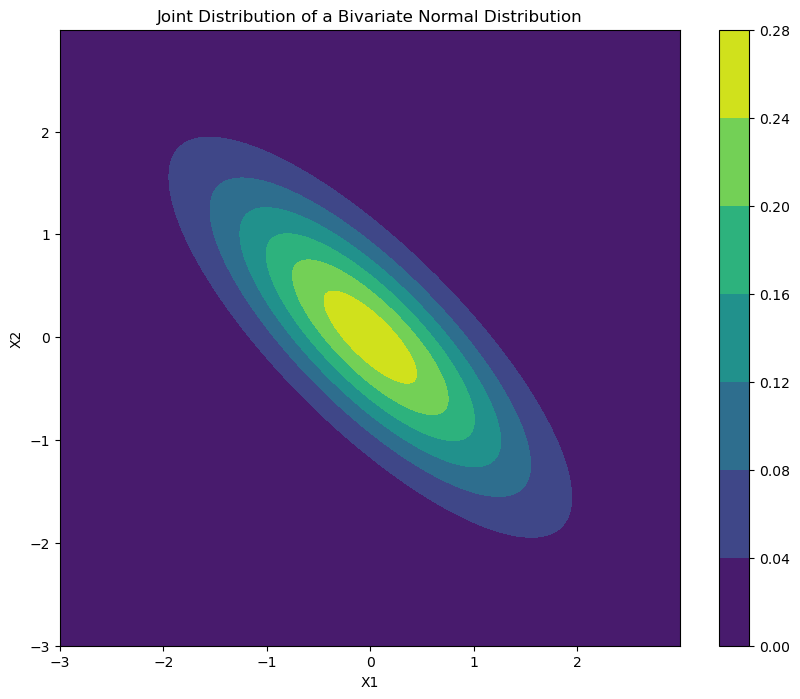

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set the mean vector and covariance matrix for a 2D multivariate normal distribution
mu = np.array([0, 0])  # mean vector
cov = np.array([[1.0, -0.8], [-0.8, 1.0]])  # covariance matrix

# Generate a grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Create the multivariate normal distribution
rv = multivariate_normal(mu, cov)

# Plot the joint distribution
plt.figure(figsize=(10, 8))
plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
plt.title('Joint Distribution of a Bivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.show()

**Explanation:**
- Multivariate Normal Distribution: We define a 2D multivariate normal with mean vector mu and covariance matrix cov.
- Joint Distribution Plot: A contour plot of the joint distribution is generated.

#### Conditional Distribution: 
We fix $X1$ at a value (e.g., 1.0) and calculate the conditional distribution for $X2$ using the conditional mean and variance formulas.

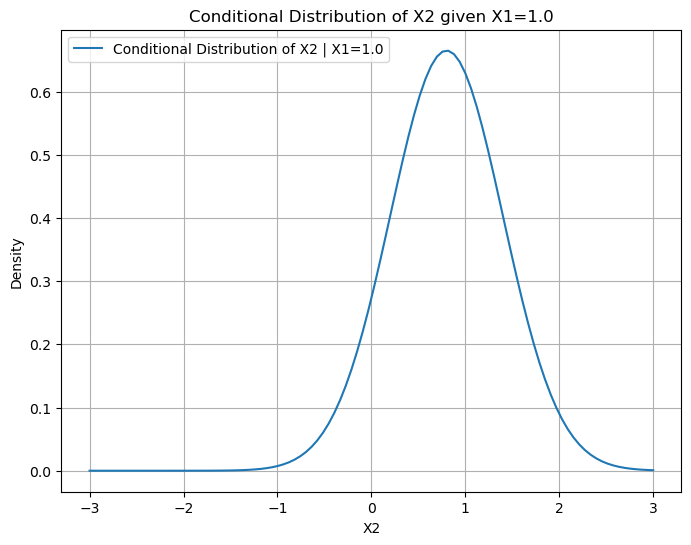

In [11]:
# Now, let's visualize the conditional distribution of X2 given X1 = x1
x1_val = 1.0  # Fix X1 at this value

# Compute the conditional mean and variance
conditional_mean = mu[1] + cov[1, 0] / cov[0, 0] * (x1_val - mu[0])
conditional_var = cov[1, 1] - cov[1, 0]**2 / cov[0, 0]

# Plot the conditional distribution
x2_vals = np.linspace(-3, 3, 100)
conditional_pdf = multivariate_normal.pdf(x2_vals, mean=conditional_mean, cov=conditional_var)

plt.figure(figsize=(8, 6))
plt.plot(x2_vals, conditional_pdf, label=f'Conditional Distribution of X2 | X1={x1_val}')
plt.title(f'Conditional Distribution of X2 given X1={x1_val}')
plt.xlabel('X2')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

In the example provided, $X1$ corresponds to the x-axis, and $X2$ corresponds to the y-axis. Here's the breakdown:
- The x variable in the np.mgrid call represents the grid of $X1$ values.
- The y variable in the np.mgrid call represents the grid of $X2$ values.

So:
- $X1 = x$ (the horizontal axis in the contour plot).
- $X2 = y$ (the vertical axis in the contour plot).

When conditioning on $X1 =x1$, we are fixing a value for $x$, and then calculating the conditional distribution of $y$ (which corresponds to $X2$).